# Optimization practical assignment

### Students:
- Sergio Fernández Munguía
- Iván Sotillo del Horno


## First algorithm implementation: Golden Section.

In the next cell we have implemented the golden section algorithm for a 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def golden_section(f, interval, tol):
    """
    Golden Section Search algorithm for finding the minimum of a unimodal function.
    
    Parameters
    ----------
    f : callable
        The objective function to minimize. Must accept a single float argument.
    interval : tuple
        A tuple (lower_bound, upper_bound) defining the search interval.
    tol : float
        Tolerance for termination. Algorithm stops when interval size is less than this value.
    
    Returns
    -------
    float
        The estimated position of the minimum within the interval.
    """
    lower_bound, upper_bound = interval
    golden_ratio = (1 + 5 ** 0.5) / 2
    
    # Initial probe points
    left_probe = upper_bound - (upper_bound - lower_bound) / golden_ratio
    right_probe = lower_bound + (upper_bound - lower_bound) / golden_ratio
    
    steps = 1
    while abs(upper_bound - lower_bound) > tol:
        if f(left_probe) < f(right_probe):
            upper_bound = right_probe
            right_probe = left_probe
            left_probe = upper_bound - (upper_bound - lower_bound) / golden_ratio
        else:
            lower_bound = left_probe
            left_probe = right_probe
            right_probe = lower_bound + (upper_bound - lower_bound) / golden_ratio
        steps += 1
    print(f"Steps needed: {steps}")
    return (lower_bound + upper_bound) / 2  

Now, to prove if the implementation of the algorithm is correct, we will generate some functions to test it:

$$
f(x) = \left|-x^2 + 6x -7\right|; \hspace{5mm} x \in \left[0, 3\right]
$$

$$
g(x) = \sin(3 \sqrt{x})- \frac{1}{2} \cos(x); \hspace{5mm} x \in \left[0, 10\right]
$$

In [17]:
def test_golden_section(functions, intervals, tol=1e-4, names=None):
    
    for i, (func, interval) in enumerate(zip(functions, intervals)):
        min_x = golden_section(func, interval, tol)
        min_y = func(min_x)
        lower, upper = interval
        x = np.linspace(lower, upper, 1000)
        y = np.array([func(xi) for xi in x])
        
        plt.figure(figsize=(10, 6))

        plt.plot(x, y, 'b-', linewidth=2, label='Function')

        plt.axvline(x=lower, color='gray', linestyle='--', alpha=0.7, label='Initial interval')
        plt.axvline(x=upper, color='gray', linestyle='--', alpha=0.7)

        plt.plot(min_x, min_y, 'ro', markersize=8, label=f'Minimum: ({min_x:.6f}, {min_y:.6f})')

        func_name = f"Function {i+1}" if names is None or i >= len(names) else names[i]
        plt.title(f"Optimization of ${func_name}$")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
        
        # Print results
        print(f"Function: {func_name}")
        print(f"Minimum found at x = {min_x:.6f}, f(x) = {min_y:.6f}")
        print("-" * 40)

Steps needed: 23


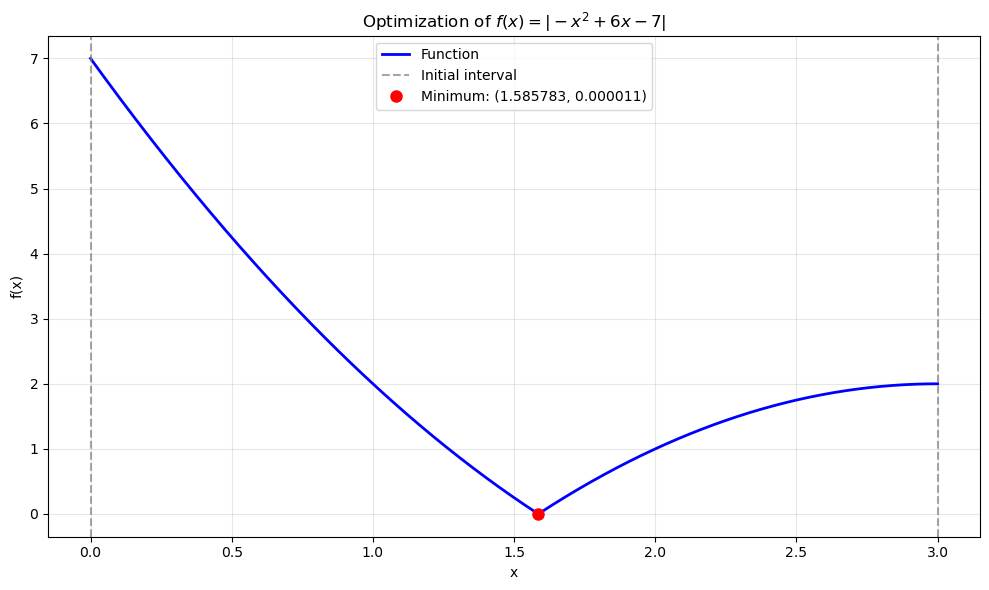

Function: f(x) = |-x^2 + 6x - 7|
Minimum found at x = 1.585783, f(x) = 0.000011
----------------------------------------
Steps needed: 25


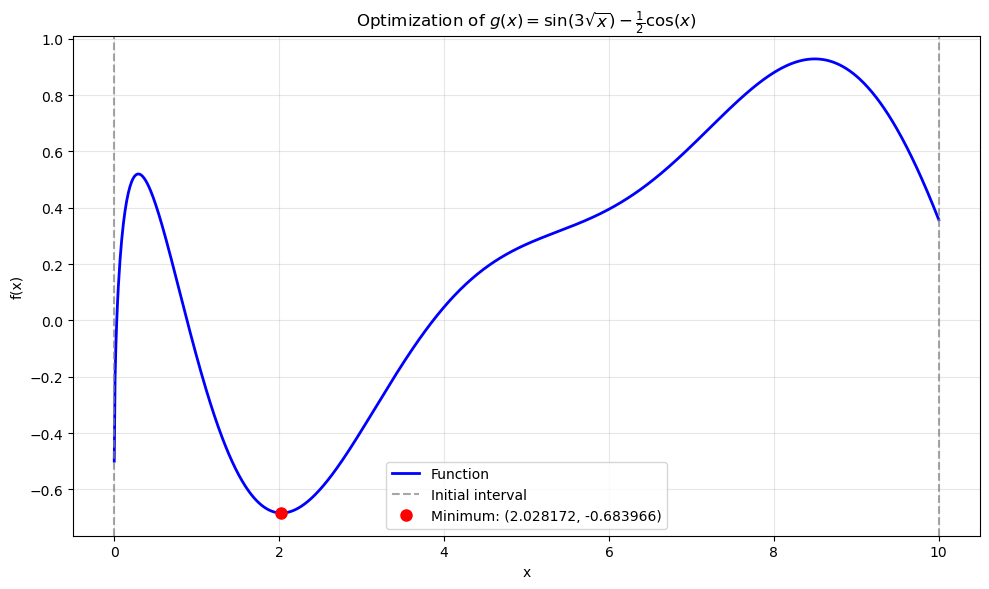

Function: g(x) = \sin(3\sqrt{x}) - \frac{1}{2}\cos(x)
Minimum found at x = 2.028172, f(x) = -0.683966
----------------------------------------


In [18]:
function_names = [
    "f(x) = |-x^2 + 6x - 7|",
    "g(x) = \\sin(3\\sqrt{x}) - \\frac{1}{2}\\cos(x)"
]

f = lambda x: np.abs(-x ** 2 + 6 * x - 7)
g = lambda x: np.sin(3 * np.sqrt(x)) - (1/2) * np.cos(x)


test_golden_section(
    functions=[f, g],
    intervals=[(0, 3), (0, 10)],
    names=function_names
)

## Second algorithm implementation: Newton Method.

In [19]:
def newton_method(f, x0, tol=1e-6, max_iter=100):
    """
    Newton's Method for finding the minimum of a function.
    
    Parameters
    ----------
    f : callable
        The objective function to minimize. Must accept a single float argument.
    x0 : float
        Initial guess for the minimum.
    tol : float
        Tolerance for termination. Algorithm stops when the update step is less than this value.
    max_iter : int
        Maximum number of iterations.
    
    Returns
    -------
    float
        The estimated position of the minimum.
    """
    # For numerical differentiation
    h = 1e-5
    
    x = x0
    steps = 0
    
    for i in range(max_iter):
        # Numerical first derivative
        f_prime = (f(x + h) - f(x - h)) / (2 * h)
        
        # Numerical second derivative
        f_double_prime = (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
        
        # Check if second derivative is too close to zero
        if abs(f_double_prime) < 1e-10:
            print(f"Second derivative too small at iteration {i}")
            break
            
        # Newton update step
        step = f_prime / f_double_prime
        x_new = x - step
        
        steps += 1
        
        # Check for convergence
        if abs(step) < tol:
            break
            
        x = x_new
        
    print(f"Steps needed: {steps}")
    return x

In [20]:
def test_newton_method(functions, initial_guesses, tol=1e-6, max_iter=100, names=None):
    
    for i, (func, x0) in enumerate(zip(functions, initial_guesses)):
        min_x = newton_method(func, x0, tol, max_iter)
        min_y = func(min_x)
        
        # Determine a suitable plotting range around the minimum
        plot_range = max(1.0, abs(min_x) * 2)
        lower = min_x - plot_range
        upper = min_x + plot_range
        
        x = np.linspace(lower, upper, 1000)
        y = np.array([func(xi) for xi in x])
        
        plt.figure(figsize=(10, 6))

        plt.plot(x, y, 'b-', linewidth=2, label='Function')

        # Mark the initial guess
        plt.axvline(x=x0, color='gray', linestyle='--', alpha=0.7, label='Initial guess')
        
        # Mark the minimum found
        plt.plot(min_x, min_y, 'ro', markersize=8, label=f'Minimum: ({min_x:.6f}, {min_y:.6f})')
        plt.plot(x0, func(x0), 'go', markersize=6, label=f'Initial point: ({x0:.6f}, {func(x0):.6f})')

        # Set plot title and labels
        func_name = f"Function {i+1}" if names is None or i >= len(names) else names[i]
        plt.title(f"Newton's Method Optimization of ${func_name}$")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
        
        # Print results
        print(f"Function: {func_name}")
        print(f"Initial guess: x0 = {x0}")
        print(f"Minimum found at x = {min_x:.6f}, f(x) = {min_y:.6f}")
        print("-" * 40)

Steps needed: 3


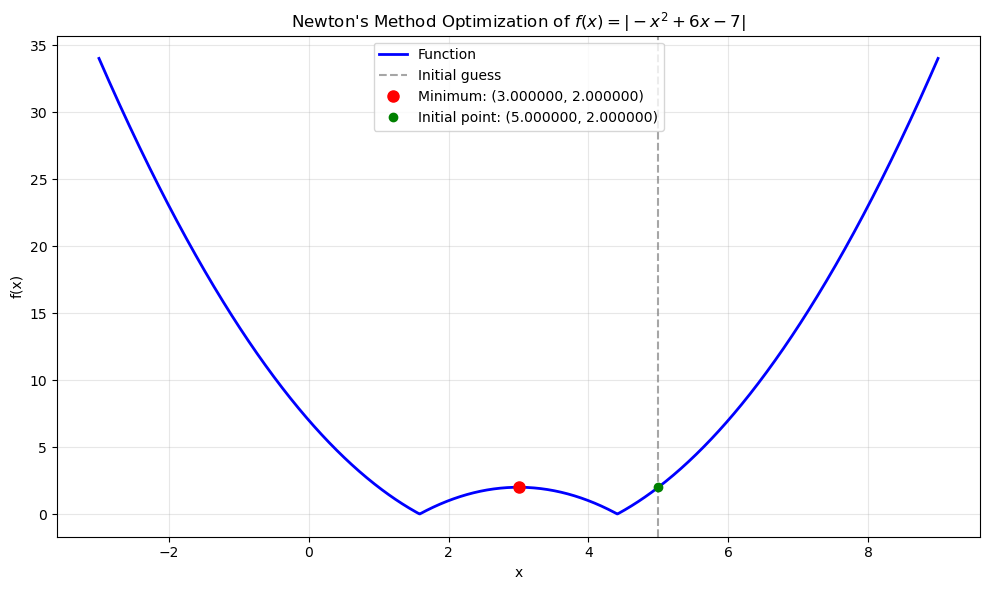

Function: f(x) = |-x^2 + 6x - 7|
Initial guess: x0 = 5.0
Minimum found at x = 3.000000, f(x) = 2.000000
----------------------------------------
Steps needed: 12


C:\Users\eps\AppData\Local\Temp\ipykernel_2200\1499032003.py:7: RuntimeWarning: invalid value encountered in sqrt
  g = lambda x: np.sin(3 * np.sqrt(x)) - (1/2) * np.cos(x)


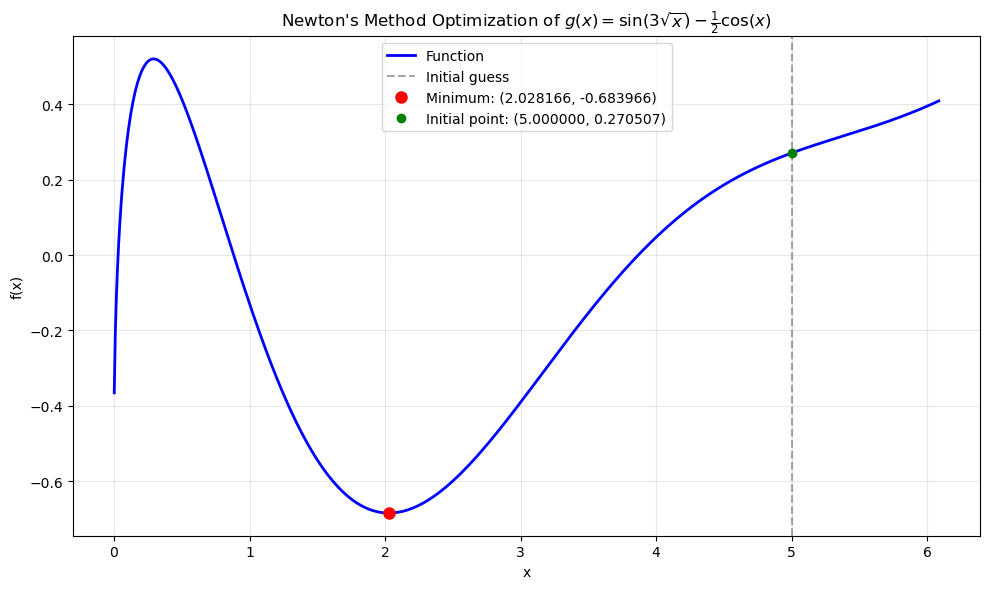

Function: g(x) = \sin(3\sqrt{x}) - \frac{1}{2}\cos(x)
Initial guess: x0 = 5.0
Minimum found at x = 2.028166, f(x) = -0.683966
----------------------------------------


In [21]:
function_names = [
    "f(x) = |-x^2 + 6x - 7|",
    "g(x) = \\sin(3\\sqrt{x}) - \\frac{1}{2}\\cos(x)",
]

f = lambda x: np.abs(-x ** 2 + 6 * x - 7)
g = lambda x: np.sin(3 * np.sqrt(x)) - (1/2) * np.cos(x)

test_newton_method(
    functions=[f, g],
    initial_guesses=[5.0, 5.0],
    names=function_names
)

We can see that Newton's method fails in the first one, $f(x) = |-x^2 + 6x - 7|$, since it has an absolute value and that means that it is not differentiable exactly where the minima is, this is what makes it fail since the Newton's method relies on the derivatives.